In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# For ML models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Saving model
import pickle


In [2]:
# Step 2: Load the dataset
crop = pd.read_csv("Crop_recommendation.csv")

# Display first 5 rows to check
crop.head()


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
# Step 3: Explore dataset

# Check how many rows and columns
print("Shape of the dataset:", crop.shape)

# Basic info (columns, datatypes, non-null counts)
crop.info()

# Check for missing values
print("\nMissing values:\n", crop.isnull().sum())

# Check for duplicate rows
print("\nDuplicate rows:", crop.duplicated().sum())

# Get summary statistics
crop.describe()


Shape of the dataset: (2199, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2199 non-null   int64  
 1   P            2199 non-null   int64  
 2   K            2199 non-null   int64  
 3   temperature  2199 non-null   float64
 4   humidity     2199 non-null   float64
 5   ph           2199 non-null   float64
 6   rainfall     2199 non-null   float64
 7   label        2199 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB

Missing values:
 N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

Duplicate rows: 0


,N,P,K,temperature,humidity,ph,rainfall
count,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000
mean,50.521601,53.372442,48.155525,25.615945,71.490581,6.469348,103.452872
std,36.898508,32.990237,50.658551,5.064881,22.265047,0.774089,54.968561
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.768393,60.273103,5.971573,64.544549
50%,37.000000,51.000000,32.000000,25.597049,80.474764,6.424671,94.781896
75%,84.000000,68.000000,49.000000,28.561810,89.960531,6.923776,124.222072
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [4]:
# Encode crop labels (text to numbers)

crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}

# Map label column
crop['label'] = crop['label'].map(crop_dict)

# Check if label mapping is done
crop['label'].unique()


array([ 1,  2, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,
        6,  5,  4,  3, 22])

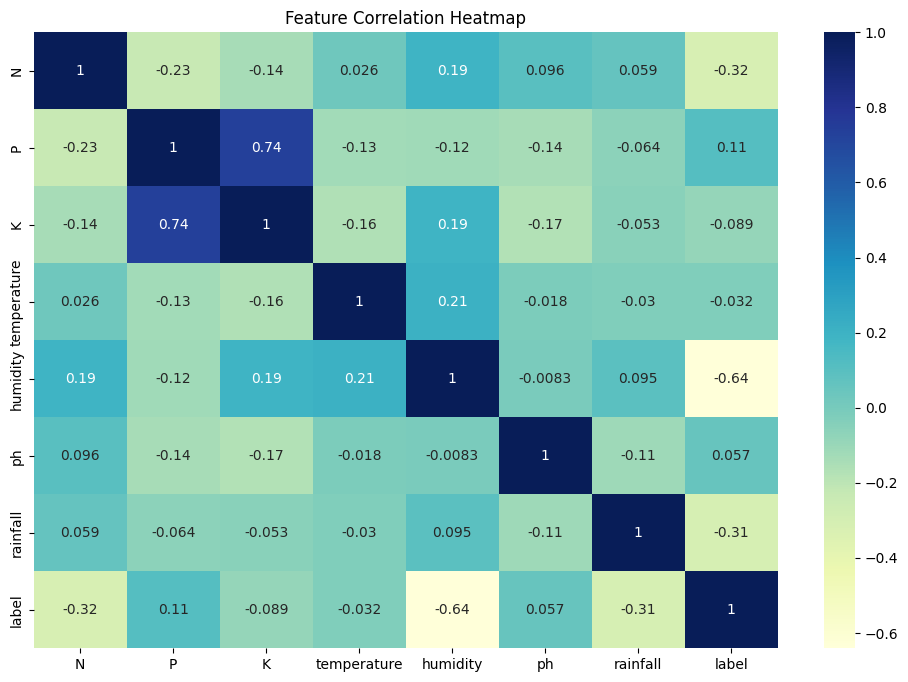

In [5]:
# Step 4: Visualize correlation between features

# Calculate correlation matrix
correlation_matrix = crop.corr()

# Create heatmap
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', cbar=True)
plt.title("Feature Correlation Heatmap")
plt.show()


In [6]:
# Step 5: Split dataset into features and target

X = crop.drop('label', axis=1)  # Features (inputs)
y = crop['label']               # Target (output)

# Check first few rows
print(X.head())
print(y.head())


    N   P   K  temperature   humidity        ph    rainfall
0  90  42  43    20.879744  82.002744  6.502985  202.935536
1  85  58  41    21.770462  80.319644  7.038096  226.655537
2  60  55  44    23.004459  82.320763  7.840207  263.964248
3  74  35  40    26.491096  80.158363  6.980401  242.864034
4  78  42  42    20.130175  81.604873  7.628473  262.717340
0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64


In [7]:
# Step 6: Train-Test Split

from sklearn.model_selection import train_test_split

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (1759, 7)
Testing set shape: (440, 7)


In [8]:
# Step 7: Feature Scaling

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# First apply Min-Max Scaling
mx = MinMaxScaler()
X_train = mx.fit_transform(X_train)
X_test = mx.transform(X_test)

# Now apply Standard Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [9]:
# Step 8: Train multiple models and evaluate accuracy

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

# List of models
models = {
    'LogisticRegression': LogisticRegression(),
    'GaussianNB': GaussianNB(),
    'SVC': SVC(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'ExtraTreeClassifier': ExtraTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'BaggingClassifier': BaggingClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier()
}

# Train and test each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print(f"{name} model Accuracy: {score:.4f}")


LogisticRegression model Accuracy: 0.9591
GaussianNB model Accuracy: 0.9955
SVC model Accuracy: 0.9705
KNeighborsClassifier model Accuracy: 0.9568
DecisionTreeClassifier model Accuracy: 0.9841
ExtraTreeClassifier model Accuracy: 0.9295
RandomForestClassifier model Accuracy: 0.9955
BaggingClassifier model Accuracy: 0.9932
GradientBoostingClassifier model Accuracy: 0.9864
AdaBoostClassifier model Accuracy: 0.2659


In [10]:
# Step 9: Save the best model (Random Forest) using pickle

import pickle

# Train the final model (RandomForest)
randclf = RandomForestClassifier()
randclf.fit(X_train, y_train)

# Save the model
pickle.dump(randclf, open('model.pkl', 'wb'))

# Save MinMaxScaler and StandardScaler
pickle.dump(mx, open('minmaxscaler.pkl', 'wb'))
pickle.dump(sc, open('standscaler.pkl', 'wb'))

print("Model and scalers saved successfully!")


Model and scalers saved successfully!


In [11]:
# Step 10: Recommendation function for real-time input

def recommendation(N, P, K, temperature, humidity, ph, rainfall):
    features = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    
    # Apply the same scaling steps used during training
    mx_features = mx.transform(features)
    sc_features = sc.transform(mx_features)
    
    # Predict the crop label using the saved model
    prediction = randclf.predict(sc_features)
    
    # Return predicted crop label
    return prediction[0]


C:\Users\tamil\AppData\Local\Temp\ipykernel_5456\1018874597.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop['P'])


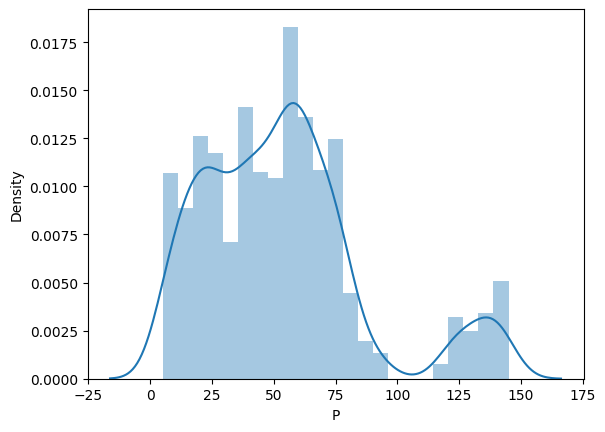

In [12]:
import matplotlib.pyplot as plt
sns.distplot(crop['P'])
plt.show()

In [13]:
crop.label.unique()

array([ 1,  2, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,
        6,  5,  4,  3, 22])